# Bank Customer Churn Prediction using ANN - Artificial Neural Network

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
import tensorflow
from keras.callbacks import EarlyStopping
from keras.regularizers import L1
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

C:\Users\Abubakar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r'C:\Users\Abubakar\OneDrive\Desktop\Excel_Files\Bank Customer Churn.csv',usecols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany', 'Spain','Female', 'Male', 'Mem__no__Products', 'Age_Tenure_product'])
df.sample(5)

C:\Users\Abubakar\AppData\Local\Temp\ipykernel_7920\2491008303.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\Abubakar\OneDrive\Desktop\Excel_Files\Bank Customer Churn.csv',usecols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany', 'Spain','Female', 'Male', 'Mem__no__Products', 'Age_Tenure_product'])


CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
165653        678.0  36.0     3.0  145747.67            2.0          0   
22671         632.0  33.0     7.0  122453.97            2.0          0   
160925        683.0  39.0     4.0       0.00            1.0          1   
116533        679.0  35.0     5.0  151823.40            2.0          1   
11814         584.0  37.0     1.0       0.00            2.0          1   

        IsActiveMember EstimatedSalary  Exited  France  Germany  Spain  \
165653               1        89566.74       0       0        1      0   
22671                1       172450.04       0       1        0      0   
160925               0       103906.85       1       1        0      0   
116533               1       116672.02       0       0        1      0   
11814                0        93820.49       0       1        0      0   

        Female  Male  Mem__no__Products  Age_Tenure_product  
165653       0     1                2.0               108.0  
22671        1     0                2.0               231.0  
160925       1     0                0.0               156.0  
116533       0     1                2.0               175.0  
11814        0     1                0.0                37.0

In [3]:
df.shape

(175028, 16)

In [4]:
df.isnull().sum()

CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Age_Tenure_product    0
dtype: int64

In [5]:
df.duplicated().sum()

334

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174694 entries, 0 to 175027
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         174694 non-null  float64
 1   Age                 174694 non-null  float64
 2   Tenure              174694 non-null  float64
 3   Balance             174694 non-null  float64
 4   NumOfProducts       174694 non-null  float64
 5   HasCrCard           174694 non-null  int64  
 6   IsActiveMember      174694 non-null  int64  
 7   EstimatedSalary     174694 non-null  object 
 8   Exited              174694 non-null  int64  
 9   France              174694 non-null  int64  
 10  Germany             174694 non-null  int64  
 11  Spain               174694 non-null  int64  
 12  Female              174694 non-null  int64  
 13  Male                174694 non-null  int64  
 14  Mem__no__Products   174694 non-null  float64
 15  Age_Tenure_product  174694 non-null  fl

In [8]:
df.shape

(174694, 16)

In [9]:
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')
df = df.dropna(subset=['EstimatedSalary'])

In [10]:
df.shape

(174692, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174692 entries, 0 to 175027
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         174692 non-null  float64
 1   Age                 174692 non-null  float64
 2   Tenure              174692 non-null  float64
 3   Balance             174692 non-null  float64
 4   NumOfProducts       174692 non-null  float64
 5   HasCrCard           174692 non-null  int64  
 6   IsActiveMember      174692 non-null  int64  
 7   EstimatedSalary     174692 non-null  float64
 8   Exited              174692 non-null  int64  
 9   France              174692 non-null  int64  
 10  Germany             174692 non-null  int64  
 11  Spain               174692 non-null  int64  
 12  Female              174692 non-null  int64  
 13  Male                174692 non-null  int64  
 14  Mem__no__Products   174692 non-null  float64
 15  Age_Tenure_product  174692 non-null  fl

In [12]:
df.describe()

CreditScore            Age         Tenure        Balance  \
count  174692.000000  174692.000000  174692.000000  174692.000000   
mean      656.114441      38.171340       5.019869   56655.425660   
std        81.130688       8.967397       2.811163   62982.809287   
min       350.000000      18.000000       0.000000       0.000000   
25%       597.000000      32.000000       3.000000       0.000000   
50%       659.000000      37.000000       5.000000       0.000000   
75%       710.000000      42.000000       7.000000  120727.962500   
max       850.000000      92.000000      10.000000  250898.090000   

       NumOfProducts      HasCrCard  IsActiveMember  EstimatedSalary  \
count  174692.000000  174692.000000   174692.000000    174692.000000   
mean        1.553162       0.751231        0.498649    111884.120797   
std         0.549257       0.432301        0.500000     50798.312332   
min         1.000000       0.000000        0.000000        11.580000   
25%         1.000000       1.000000        0.000000     73321.575000   
50%         2.000000       1.000000        0.000000    116971.050000   
75%         2.000000       1.000000        1.000000    154767.340000   
max         4.000000       1.000000        1.000000    199992.480000   

              Exited         France        Germany          Spain  \
count  174692.000000  174692.000000  174692.000000  174692.000000   
mean        0.211366       0.566849       0.212047       0.221103   
std         0.408279       0.495512       0.408759       0.414991   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         0.000000       1.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              Female           Male  Mem__no__Products  Age_Tenure_product  
count  174692.000000  174692.000000      174692.000000       174692.000000  
mean        0.436654       0.563346           0.784856          191.349926  
std         0.495973       0.495973           0.871618          118.755000  
min         0.000000       0.000000           0.000000            0.000000  
25%         0.000000       0.000000           0.000000           93.000000  
50%         0.000000       1.000000           0.000000          180.000000  
75%         1.000000       1.000000           2.000000          272.000000  
max         1.000000       1.000000           4.000000          880.000000

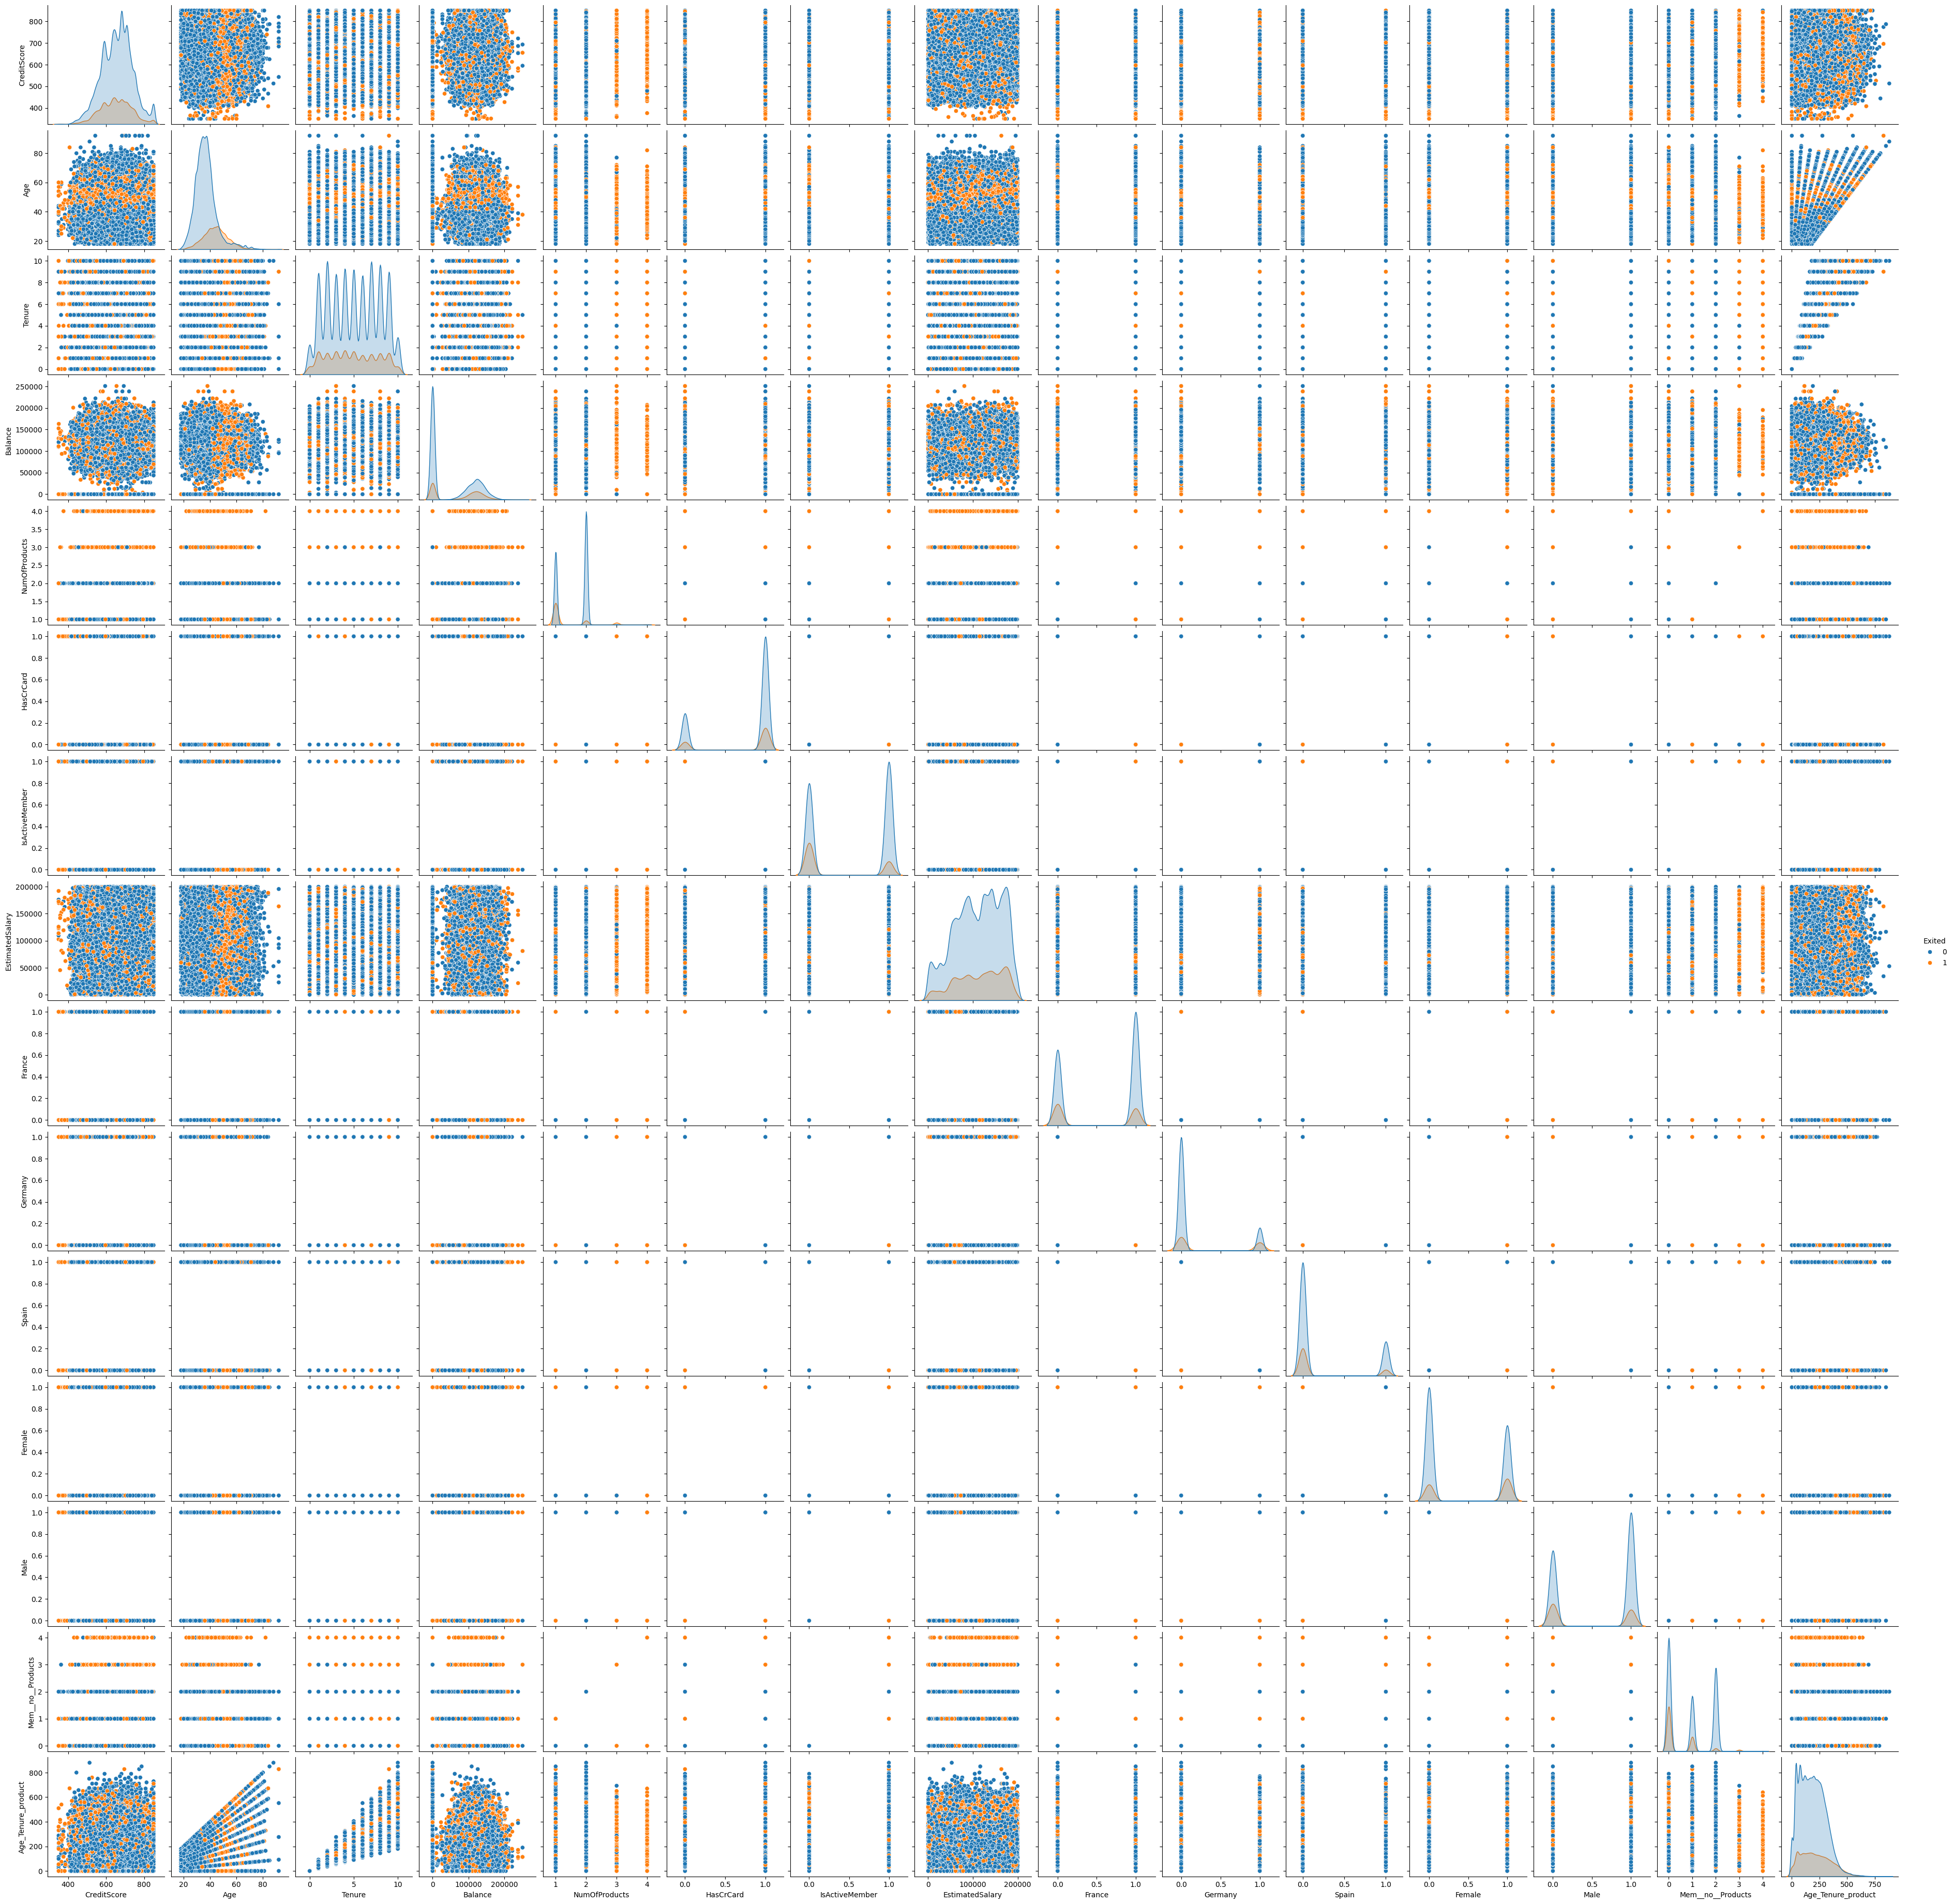

In [14]:
sns.pairplot(df, hue = "Exited")
plt.show()

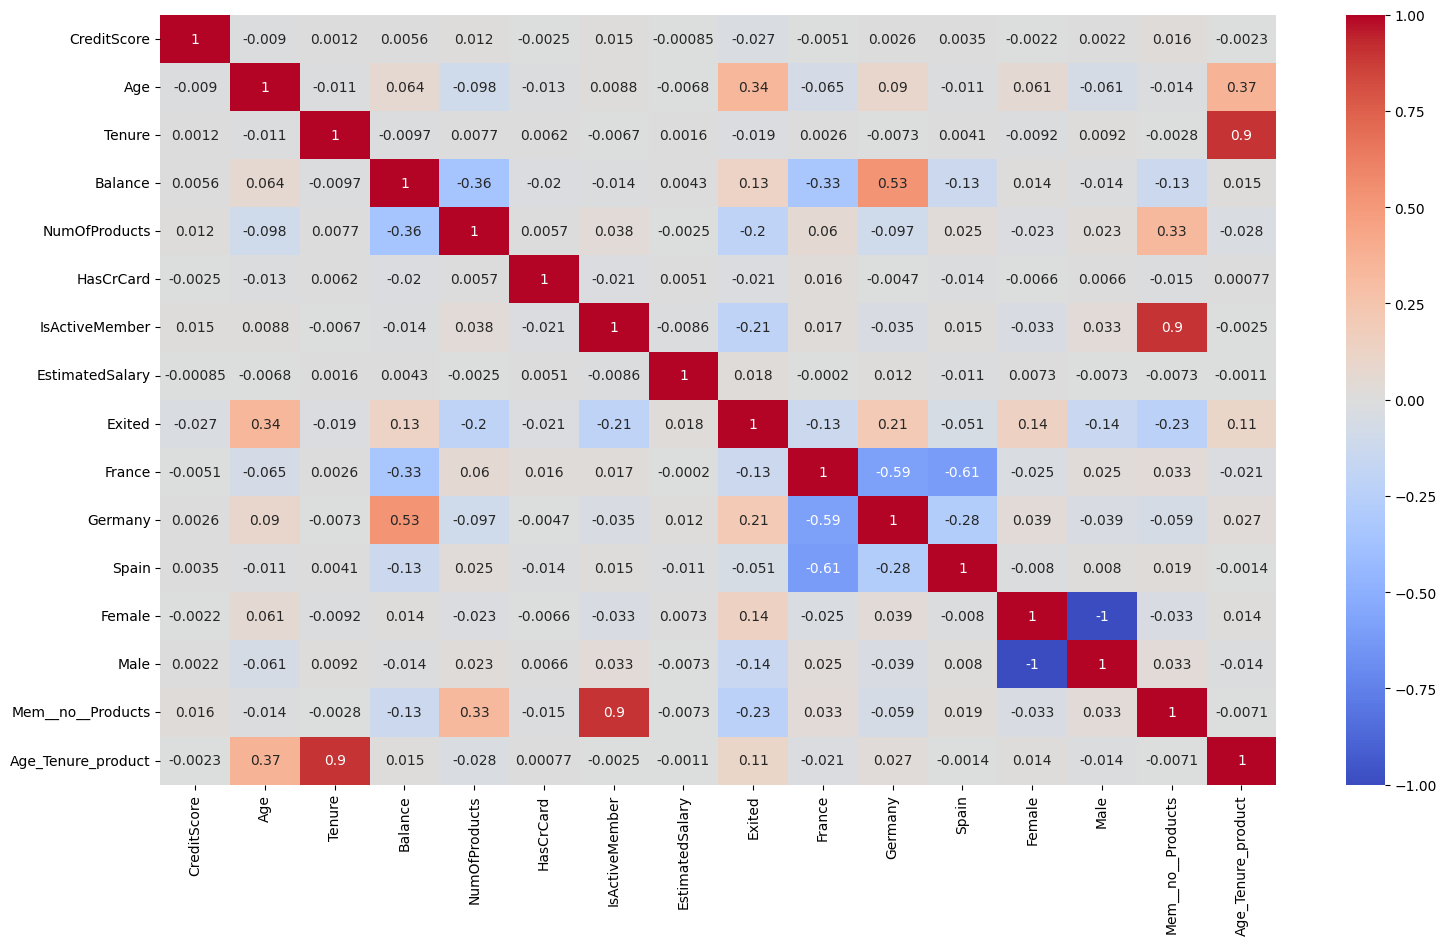

In [14]:
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [100]:
for i in df[['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited','France','Germany','Spain','Female','Male','Mem__no__Products']]:
    print(df[i].value_counts(), f'\nSkewness: {df[i].skew()}')
    print()

Tenure
2.0     19042
7.0     18795
4.0     18515
8.0     18506
5.0     18247
1.0     17765
9.0     17661
3.0     17611
6.0     16752
10.0     6388
0.0      5410
Name: count, dtype: int64 
Skewness: 0.0068387333357826825

NumOfProducts
2.0    88716
1.0    82285
3.0     3156
4.0      535
Name: count, dtype: int64 
Skewness: 0.39325938341557937

HasCrCard
1    131234
0     43458
Name: count, dtype: int64 
Skewness: -1.1623086345563625

IsActiveMember
0    87582
1    87110
Name: count, dtype: int64 
Skewness: 0.005403862521190434

Exited
0    137768
1     36924
Name: count, dtype: int64 
Skewness: 1.4139213256599485

France
1    99024
0    75668
Name: count, dtype: int64 
Skewness: -0.26982105461802375

Germany
0    137649
1     37043
Name: count, dtype: int64 
Skewness: 1.4089254212458082

Spain
0    136067
1     38625
Name: count, dtype: int64 
Skewness: 1.3441237885691066

Female
0    98412
1    76280
Name: count, dtype: int64 
Skewness: 0.2554435960898247

Male
1    98412
0    76280
Na

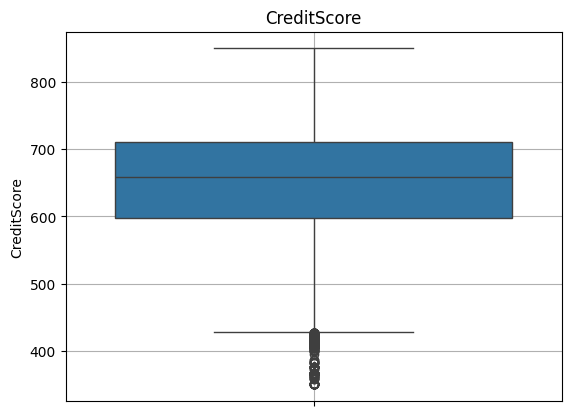

Skewness: -0.06621253349807753


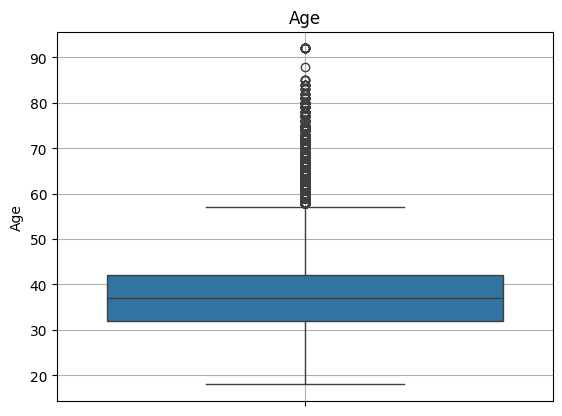

Skewness: 0.9795559019222145


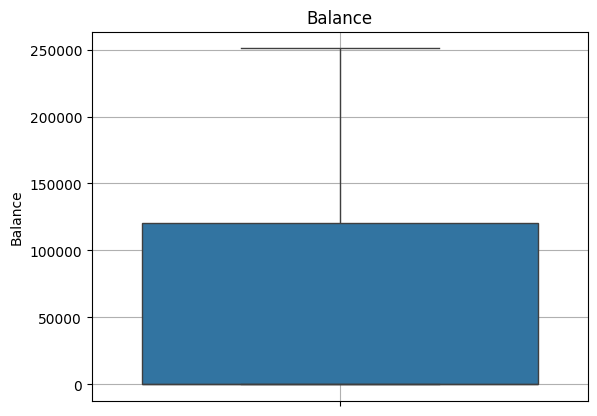

Skewness: 0.3512644221645388


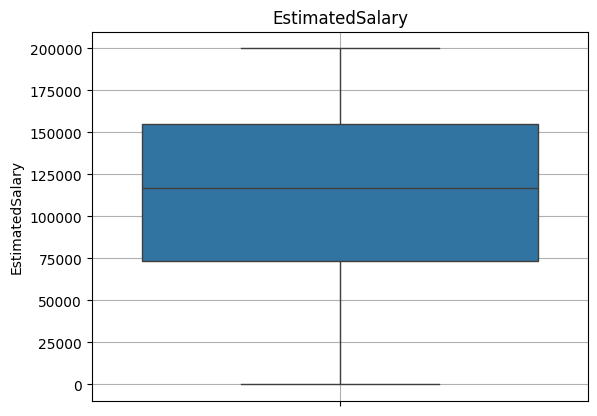

Skewness: -0.2954139800867085


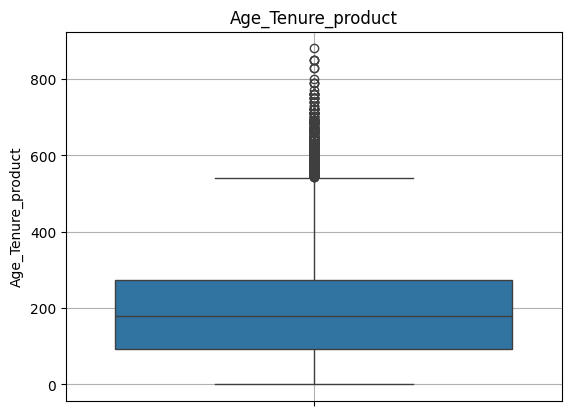

Skewness: 0.5489071854277218


In [102]:
for i in df[['CreditScore','Age','Balance','EstimatedSalary','Age_Tenure_product']]:
    sns.boxplot(df[i])
    plt.title(i)
    plt.grid()
    plt.show()
    print(f'Skewness: {df[i].skew()}')

C:\Users\Abubakar\AppData\Local\Temp\ipykernel_5772\1458840643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist=False)


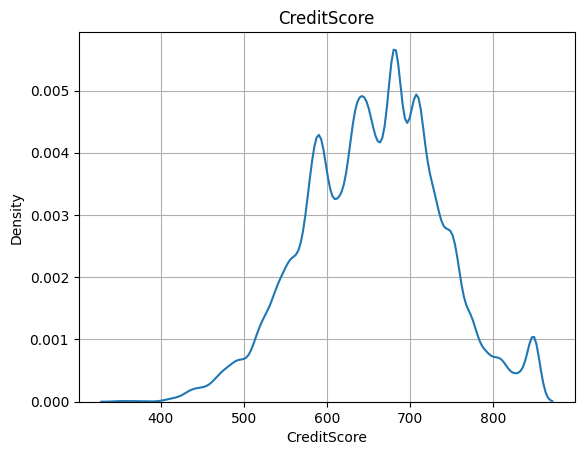

Skewness: -0.06621253349807753


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_5772\1458840643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist=False)


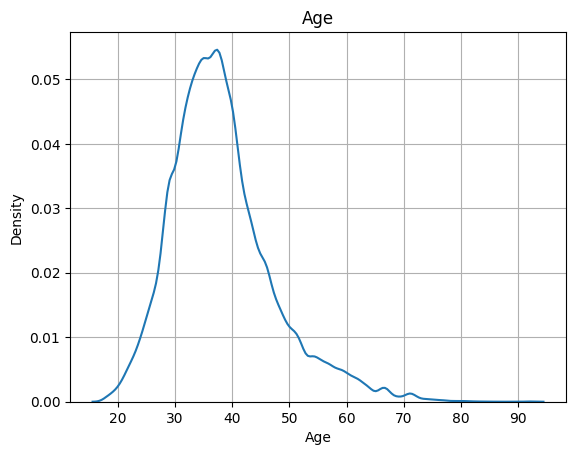

Skewness: 0.9795559019222145


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_5772\1458840643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist=False)


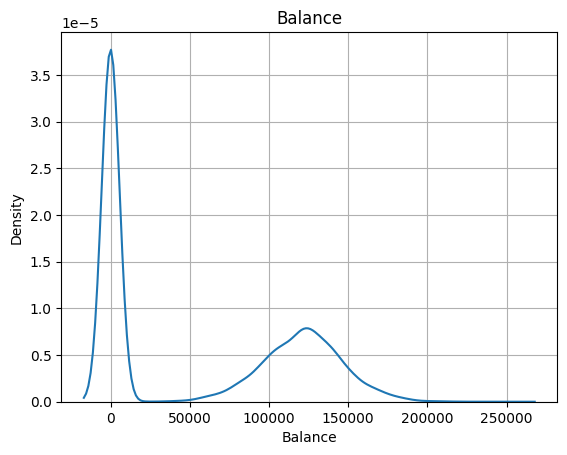

Skewness: 0.3512644221645388


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_5772\1458840643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist=False)


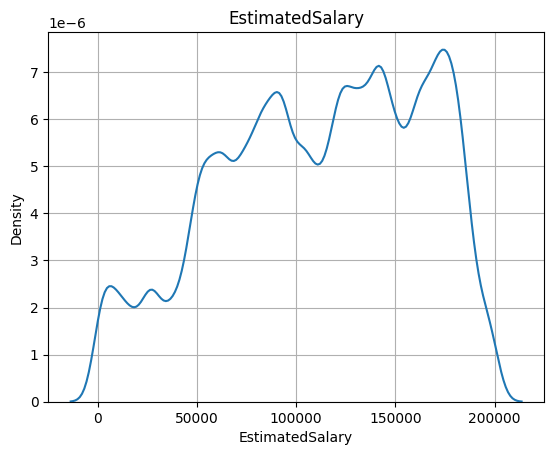

Skewness: -0.2954139800867085


C:\Users\Abubakar\AppData\Local\Temp\ipykernel_5772\1458840643.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],hist=False)


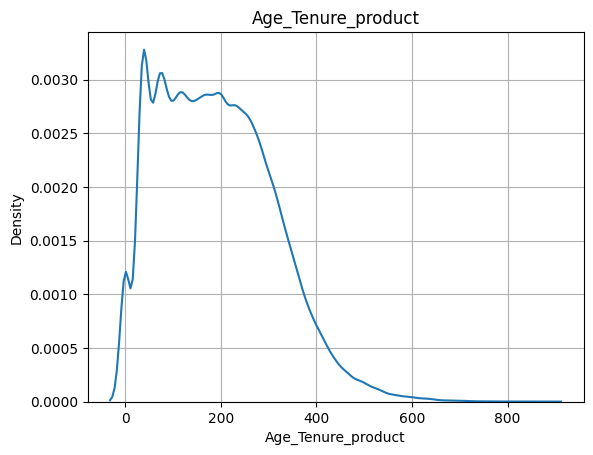

Skewness: 0.5489071854277218


In [103]:
for i in df[['CreditScore','Age','Balance','EstimatedSalary','Age_Tenure_product']]:
    sns.distplot(df[i],hist=False)
    plt.title(i)
    plt.grid()
    plt.show()
    print(f'Skewness: {df[i].skew()}')

In [15]:
x = df.iloc[:, :8].join(df.iloc[:, 9:])
y=df.iloc[:,8]

In [16]:
x

CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             668.0  33.0     3.0       0.00            2.0          1   
1             627.0  33.0     1.0       0.00            2.0          1   
2             678.0  40.0    10.0       0.00            2.0          1   
3             581.0  34.0     2.0  148882.54            1.0          1   
4             716.0  33.0     5.0       0.00            2.0          1   
...             ...   ...     ...        ...            ...        ...   
175023        644.0  28.0     7.0  155060.41            1.0          1   
175024        800.0  29.0     2.0       0.00            2.0          0   
175025        771.0  39.0     5.0       0.00            2.0          1   
175026        516.0  35.0    10.0   57369.61            1.0          1   
175027        709.0  36.0     7.0       0.00            1.0          0   

        IsActiveMember  EstimatedSalary  France  Germany  Spain  Female  Male  \
0                    0        181449.97       1        0      0       0     1   
1                    1         49503.50       1        0      0       0     1   
2                    0        184866.69       1        0      0       0     1   
3                    1         84560.88       1        0      0       0     1   
4                    1         15068.83       0        0      1       0     1   
...                ...              ...     ...      ...    ...     ...   ...   
175023               0         29179.52       1        0      0       0     1   
175024               0        167773.55       1        0      0       1     0   
175025               0         96270.64       1        0      0       0     1   
175026               1        101699.77       1        0      0       0     1   
175027               1         42085.58       1        0      0       1     0   

        Mem__no__Products  Age_Tenure_product  
0                     0.0                99.0  
1                     2.0                33.0  
2                     0.0               400.0  
3                     1.0                68.0  
4                     2.0               165.0  
...                   ...                 ...  
175023                0.0               196.0  
175024                0.0                58.0  
175025                0.0               195.0  
175026                1.0               350.0  
175027                1.0               252.0  

[174692 rows x 15 columns]

In [130]:
y

0         0
1         0
2         0
3         0
4         0
         ..
175023    0
175024    0
175025    0
175026    0
175027    1
Name: Exited, Length: 174692, dtype: int64

In [131]:
y.unique()

array([0, 1], dtype=int64)

In [17]:
ss=StandardScaler()

x=pd.DataFrame(ss.fit_transform(x)) 

In [18]:
x

0         1         2         3         4         5         6   \
0       0.146499 -0.576684 -0.718519 -0.899541  0.813534  0.575455 -0.997302   
1      -0.358860 -0.576684 -1.429971 -0.899541  0.813534  0.575455  1.002706   
2       0.269758  0.203924  1.771560 -0.899541  0.813534  0.575455 -0.997302   
3      -0.925848 -0.465169 -1.074245  1.464326 -1.007113  0.575455  1.002706   
4       0.738139 -0.576684 -0.007068 -0.899541  0.813534  0.575455  1.002706   
...          ...       ...       ...       ...       ...       ...       ...   
174687 -0.149321 -1.134261  0.704383  1.562415 -1.007113  0.575455 -0.997302   
174688  1.773509 -1.022746 -1.074245 -0.899541  0.813534 -1.737754 -0.997302   
174689  1.416060  0.092408 -0.007068 -0.899541  0.813534  0.575455 -0.997302   
174690 -1.727026 -0.353653  1.771560  0.011339 -1.007113  0.575455  1.002706   
174691  0.651858 -0.242138  0.704383 -0.899541 -1.007113 -1.737754  1.002706   

              7         8        9         10        11        12        13  \
0       1.369456  0.874150 -0.51876 -0.532792 -0.880403  0.880403 -0.900460   
1      -1.228009  0.874150 -0.51876 -0.532792 -0.880403  0.880403  1.394128   
2       1.436717  0.874150 -0.51876 -0.532792 -0.880403  0.880403 -0.900460   
3      -0.537878  0.874150 -0.51876 -0.532792 -0.880403  0.880403  0.246834   
4      -1.905882 -1.143969 -0.51876  1.876904 -0.880403  0.880403  1.394128   
...          ...       ...      ...       ...       ...       ...       ...   
174687 -1.628102  0.874150 -0.51876 -0.532792 -0.880403  0.880403 -0.900460   
174688  1.100225  0.874150 -0.51876 -0.532792  1.135844 -1.135844 -0.900460   
174689 -0.307363  0.874150 -0.51876 -0.532792 -0.880403  0.880403 -0.900460   
174690 -0.200487  0.874150 -0.51876 -0.532792 -0.880403  0.880403  0.246834   
174691 -1.374037  0.874150 -0.51876 -0.532792  1.135844 -1.135844  0.246834   

              14  
0      -0.777653  
1      -1.333421  
2       1.756984  
3      -1.038695  
4      -0.221885  
...          ...  
174687  0.039157  
174688 -1.122903  
174689  0.030736  
174690  1.335948  
174691  0.510717  

[174692 rows x 15 columns]

In [134]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174692 entries, 0 to 174691
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       174692 non-null  float64
 1   1       174692 non-null  float64
 2   2       174692 non-null  float64
 3   3       174692 non-null  float64
 4   4       174692 non-null  float64
 5   5       174692 non-null  float64
 6   6       174692 non-null  float64
 7   7       174692 non-null  float64
 8   8       174692 non-null  float64
 9   9       174692 non-null  float64
 10  10      174692 non-null  float64
 11  11      174692 non-null  float64
 12  12      174692 non-null  float64
 13  13      174692 non-null  float64
 14  14      174692 non-null  float64
dtypes: float64(15)
memory usage: 20.0 MB


In [144]:
x.shape

(174692, 15)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
ann=Sequential()

ann.add(Dense(23, input_dim=15, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(20, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(18, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(16, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(14, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(12, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(10, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(8, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(6, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(4, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(2, activation='relu'))
ann.add(BatchNormalization())

ann.add(Dense(1, activation='sigmoid')) #sigmoid because output is in binary format

In [21]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
ann.fit(x_train,y_train,batch_size=100,epochs=15, validation_data=(x_test,y_test), callbacks=EarlyStopping())

Epoch 1/15


1398/1398 [==============================] - 18s 7ms/step - loss: 0.4554 - accuracy: 0.8136 - val_loss: 0.3589 - val_accuracy: 0.8489
Epoch 2/15
1398/1398 [==============================] - 9s 7ms/step - loss: 0.3500 - accuracy: 0.8523 - val_loss: 0.3416 - val_accuracy: 0.8568
Epoch 3/15
1398/1398 [==============================] - 9s 7ms/step - loss: 0.3388 - accuracy: 0.8576 - val_loss: 0.3399 - val_accuracy: 0.8581
Epoch 4/15
1398/1398 [==============================] - 9s 7ms/step - loss: 0.3342 - accuracy: 0.8601 - val_loss: 0.3333 - val_accuracy: 0.8605
Epoch 5/15
1398/1398 [==============================] - 10s 7ms/step - loss: 0.3315 - accuracy: 0.8612 - val_loss: 0.3313 - val_accuracy: 0.8604
Epoch 6/15
1398/1398 [==============================] - 9s 7ms/step - loss: 0.3302 - accuracy: 0.8611 - val_loss: 0.3305 - val_accuracy: 0.8603
Epoch 7/15
1398/1398 [==============================] - 9s 7ms/step - loss: 0.3293 - accuracy: 0.8622 - val_loss: 0.3297 - val_accur

In [23]:
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

In [24]:
len(test_accuracy)

9

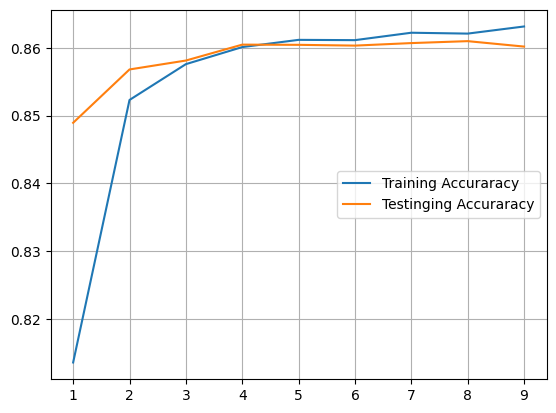

In [30]:
plt.plot([i for i in range(1,10)], train_accuracy, label = 'Training Accuraracy')
plt.plot([i for i in range(1,10)], test_accuracy, label = 'Testinging Accuraracy')
plt.legend(loc = 5)
plt.grid()
plt.show()

In [28]:
prd=ann.predict([[x_test]])

1092/1092 [==============================] - 3s 3ms/step


In [29]:
prd_data=[]

for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
        
prd_data

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [30]:
prd1=ann.predict(x_train)

4368/4368 [==============================] - 11s 2ms/step


In [31]:
prd_data1=[]

for i in prd1:
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)
    
# prd_data1

In [32]:
accuracy_score(y_train,prd_data1) ,accuracy_score(y_test,prd_data)

(0.8623428477385101, 0.860127651048971)

### Checking Values

In [33]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [34]:
x_test

0         1         2         3         4         5         6   \
75780   0.134174 -0.465169 -0.007068 -0.899541  0.813534  0.575455  1.002706   
53807  -0.802589  1.096047  1.060109  1.178095  0.813534  0.575455 -0.997302   
145413 -1.024454 -0.130622  0.704383  1.876640 -1.007113 -1.737754 -0.997302   
86584  -0.038388  2.657262 -1.785696  0.860064 -1.007113  0.575455  1.002706   
118699  0.429993  0.203924 -1.074245  1.046271 -1.007113  0.575455 -0.997302   
...          ...       ...       ...       ...       ...       ...       ...   
171062 -1.665397 -1.803353 -0.007068 -0.899541  0.813534  0.575455  1.002706   
14106   0.294409  0.649985 -1.429971 -0.899541  0.813534  0.575455  1.002706   
35683  -0.100017  1.542108 -1.785696 -0.899541 -1.007113  0.575455  1.002706   
8170   -0.173972 -0.465169 -1.074245 -0.899541  0.813534  0.575455 -0.997302   
160871  1.132566 -0.576684  0.348658 -0.899541  0.813534 -1.737754  1.002706   

              7         8         9         10        11        12        13  \
75780  -0.219825 -1.143969 -0.518760  1.876904 -0.880403  0.880403  1.394128   
53807  -0.215425 -1.143969  1.927673 -0.532792 -0.880403  0.880403 -0.900460   
145413  0.784943  0.874150 -0.518760 -0.532792 -0.880403  0.880403 -0.900460   
86584  -0.143180 -1.143969  1.927673 -0.532792  1.135844 -1.135844  0.246834   
118699  1.280363  0.874150 -0.518760 -0.532792 -0.880403  0.880403 -0.900460   
...          ...       ...       ...       ...       ...       ...       ...   
171062 -0.237325  0.874150 -0.518760 -0.532792 -0.880403  0.880403  1.394128   
14106   0.295079  0.874150 -0.518760 -0.532792  1.135844 -1.135844  1.394128   
35683   0.107075  0.874150 -0.518760 -0.532792 -0.880403  0.880403  0.246834   
8170   -1.009875  0.874150 -0.518760 -0.532792  1.135844 -1.135844 -0.900460   
160871  1.195275  0.874150 -0.518760 -0.532792  1.135844 -1.135844  1.394128   

              14  
75780  -0.179782  
53807   1.622253  
145413  0.569662  
86584  -1.611305  
118699 -0.937647  
...          ...  
171062 -0.685025  
14106  -1.240793  
35683  -1.611305  
8170   -1.038695  
160871  0.055998  

[34939 rows x 15 columns]

In [35]:
y_test

75795     0
53815     0
145468    0
86603     1
118739    0
         ..
171312    0
14106     0
35690     0
8170      0
160937    0
Name: Exited, Length: 34939, dtype: int64

In [36]:
prd2=ann.predict([[668.0, 33.0, 3.0, 0.00, 2.0, 1, 0, 181449.97, 1, 0, 0, 0, 1, 0.0, 99.0]]) #0

ss=StandardScaler()

prd2=pd.DataFrame(ss.fit_transform(prd2))

prd_data2=[]

for i in prd2:
    if i>0.5:
        prd_data2.append(1)
        print('✅ Likely to Churn')
    else:
        prd_data2.append(0)
        print('❌ Not Likely to Churn')
        
prd_data2

1/1 [==============================] - 0s 491ms/step
❌ Not Likely to Churn


[0]

In [65]:
prd2=ann.predict([[668.0, 33.0, 3.0, 0.00, 2.0, 1, 0, 181449.97, 1, 0, 0, 0, 1, 0.0, 99.0]]) #0

ss=StandardScaler()

prd2=pd.DataFrame(ss.fit_transform(prd2))

prd_data2=[]

for i in prd2:
    if i>0.5:
        prd_data2.append(1)
        print('✅ Likely to Churn')
    else:
        prd_data2.append(0)
        print('❌ Not Likely to Churn')
        
prd_data2

1/1 [==============================] - 0s 28ms/step
❌ Not Likely to Churn


[0]

In [63]:
import joblib

ann.save("ChurnPredictor.h5")          
joblib.dump(ss, "churnScaler.pkl")  

['churnScaler.pkl']

In [ ]:
# file: churn_gui.py
import tkinter as tk
import numpy as np, joblib
from tensorflow.keras.models import load_model

# Feature columns (surname removed)
cols = [
    'CreditScore','Age','Tenure','Balance','NumOfProducts',
    'HasCrCard\n(If yes = 1 else 0)','IsActiveMember\n(If yes = 1 else 0)','EstimatedSalary',
    'France\n(If yes = 1 else 0)','Germany\n(If yes = 1 else 0)','Spain\n(If yes = 1 else 0)','Female\n(If yes = 1 else 0)',
    'Male\n(If yes = 1 else 0)','Mem__no__Products','Age_Tenure_product'
]

# Load trained model and scaler
m = load_model("ChurnPredictor.h5")
s = joblib.load("churnScaler.pkl")

# GUI setup
root = tk.Tk()
root.title("Churn Predictor")
root.configure(bg="#f0f4f7")   # Light background
root.geometry("500x750")       # Set window size

# Title label
title = tk.Label(root, text="Bank Customer Churn Predictor", 
                 font=("Helvetica", 16, "bold"), 
                 fg="#ffffff", bg="#2c3e50", pady=10)
title.pack(fill="x")

# Framing for form
form_frame = tk.Frame(root, bg="#f0f4f7", padx=15, pady=10)
form_frame.pack(fill="both", expand=True)

es = {}

# Creating input fields
for i, c in enumerate(cols):
    tk.Label(form_frame, text=c, width=20, anchor='w',
             font=("Arial", 10), bg="#f0f4f7").grid(row=i, column=0, sticky='w', pady=4)
    e = tk.Entry(form_frame, width=25, font=("Arial", 10))
    e.grid(row=i, column=1, pady=4, padx=8)
    es[c] = e

# OUTPUT HEADING & LABEL 
output_heading = tk.Label(root, text="Output", 
                          font=("Helvetica", 14, "bold"),
                          fg="#2c3e50", bg="#f0f4f7", pady=10)
output_heading.pack()

output_label = tk.Label(root, text="", 
                        font=("Arial", 12), 
                        bg="#ecf0f1", fg="black", 
                        width=50, height=5, 
                        relief="sunken", justify="center", wraplength=400)
output_label.pack(pady=10)

# Prediction function with 5 stages
def pred():
    try:
        # Collecting inputs
        v = []
        for c in cols:
            t = es[c].get().strip()
            v.append(float(t))

        # Convert to numpy array
        X = np.array(v).reshape(1, -1)

        # Scale input
        if s.n_features_in_ == X.shape[1]:
            X_scaled = s.transform(X)
        else:
            X_scaled = X   # fallback if scaler wrong

        # Predicting churn probability
        p = float(m.predict(X_scaled, verbose=0)[0][0])

        # Defining 5 stages
        if p < 0.2:
            stage = "❌ Very Low Risk (Not Likely to Churn)"
        elif p < 0.4:
            stage = "⚪ Low Risk (Unlikely to Churn)"
        elif p < 0.6:
            stage = "🟡 Medium Risk (Monitor Closely)"
        elif p < 0.8:
            stage = "🟠 High Risk (Likely to Churn)"
        else:
            stage = "✅ Very High Risk (Almost Certain to Churn)"

        #Show result inside the GUI
        result_text = f"Predicted Churn Probability: {p:.4f}\nStage: {stage}"
        output_label.config(text=result_text)

    except Exception as e:
        output_label.config(text=f"Error: {str(e)}")

#button
btn = tk.Button(root, text="Predict", command=pred,
                font=("Helvetica", 12, "bold"), 
                bg="#27ae60", fg="white", 
                activebackground="#2ecc71", activeforeground="white",
                relief="raised", bd=3, width=20, pady=8)
btn.pack(pady=15)

root.mainloop()

C:\Users\Abubakar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [31]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male', 'Mem__no__Products', 'Age_Tenure_product'],
      dtype='object')

In [ ]:
668.0, 33.0, 3.0, 0.00, 2.0, 1, 0, 181449.97, 1, 0, 0, 0, 1, 0.0, 99.0 # 0